In [1]:
import numpy as np
import pandas as pd
import session_info
from lifelines import KaplanMeierFitter
from matplotlib.pyplot import subplots
from sksurv.nonparametric import kaplan_meier_estimator
session_info.show()

In [2]:
#Loading the dataset from a CSV file
df = pd.read_csv('Book1CSV.csv')
df.head()

,Patient ID,Date of Birth,Age,Gender,Date of Diagnosis,Date of Death,Date of Last Follow-Up,Date of Admission,Date of Discharge,Disease Stage,Treatment Received,Comorbidities,Smoking Status,Family History,Vital Signs
0,P-001,15-05-1990,32,Male,10-01-2022,NaN,01-06-2022,10-01-2022,20-01-2022,Stage II,Surgery,Hypertension,Non-Smoker,None,120/80
1,P-002,22-09-1975,47,Female,05-11-2022,20-03-2023,20-03-2023,05-11-2022,20-03-2023,Stage III,Chemotherapy,Diabetes,Former Smoker,Breast Cancer,130/70
2,P-003,12-12-1988,33,Male,20-07-2022,NaN,15-12-2023,20-07-2022,29-08-2023,Stage I,Observation,NaN,Non-Smoker,None,115/75
3,P-004,30-03-1965,56,Male,08-09-2022,05-01-2023,05-01-2023,08-09-2022,05-01-2023,Stage IV,Radiation Therapy,Hypertension,Smoker,None,140/90
4,P-005,25-06-1980,41,Female,12-04-2023,NaN,12-10-2023,12-04-2023,16-05-2023,Stage II,Surgery,NaN,Non-Smoker,None,125/80


In [3]:
#Preprocessing the data
df["Status"] = df["Date of Death"]
df["Status"] = df["Status"].notnull().astype(int)
df["Time"] = (pd.to_datetime(df['Date of Last Follow-Up'], format='%d-%m-%Y') - pd.to_datetime(df['Date of Admission'], format='%d-%m-%Y')).dt.days
df.to_csv("Transformed Data.csv", encoding='utf-8')
T = df["Time"]
E = df["Status"]
df.head()

,Patient ID,Date of Birth,Age,Gender,Date of Diagnosis,Date of Death,Date of Last Follow-Up,Date of Admission,Date of Discharge,Disease Stage,Treatment Received,Comorbidities,Smoking Status,Family History,Vital Signs,Status,Time
0,P-001,15-05-1990,32,Male,10-01-2022,NaN,01-06-2022,10-01-2022,20-01-2022,Stage II,Surgery,Hypertension,Non-Smoker,None,120/80,0,142
1,P-002,22-09-1975,47,Female,05-11-2022,20-03-2023,20-03-2023,05-11-2022,20-03-2023,Stage III,Chemotherapy,Diabetes,Former Smoker,Breast Cancer,130/70,1,135
2,P-003,12-12-1988,33,Male,20-07-2022,NaN,15-12-2023,20-07-2022,29-08-2023,Stage I,Observation,NaN,Non-Smoker,None,115/75,0,513
3,P-004,30-03-1965,56,Male,08-09-2022,05-01-2023,05-01-2023,08-09-2022,05-01-2023,Stage IV,Radiation Therapy,Hypertension,Smoker,None,140/90,1,119
4,P-005,25-06-1980,41,Female,12-04-2023,NaN,12-10-2023,12-04-2023,16-05-2023,Stage II,Surgery,NaN,Non-Smoker,None,125/80,0,183


In [4]:
#Performing Kaplan-Meier survival analysis
kmf = KaplanMeierFitter()
km_cancer = kmf.fit(T,E)

In [5]:
#Calculating the survival probabilities over time

In [6]:
print(km_cancer.median_survival_time_)
print(km_cancer.survival_function_)

482.0
          KM_estimate
timeline             
0.0          1.000000
5.0          1.000000
14.0         1.000000
16.0         1.000000
26.0         0.980769
30.0         0.980769
31.0         0.980769
53.0         0.980769
56.0         0.980769
57.0         0.980769
61.0         0.980769
62.0         0.958479
67.0         0.958479
69.0         0.958479
76.0         0.958479
77.0         0.933903
84.0         0.933903
85.0         0.908662
93.0         0.908662
95.0         0.908662
119.0        0.881937
135.0        0.855211
142.0        0.855211
151.0        0.855211
153.0        0.855211
155.0        0.855211
157.0        0.855211
183.0        0.855211
184.0        0.855211
194.0        0.855211
209.0        0.818028
212.0        0.818028
230.0        0.779074
235.0        0.740121
244.0        0.740121
263.0        0.740121
276.0        0.696584
303.0        0.696584
304.0        0.696584
339.0        0.597072
359.0        0.597072
365.0        0.597072
395.0        0.597072
446.

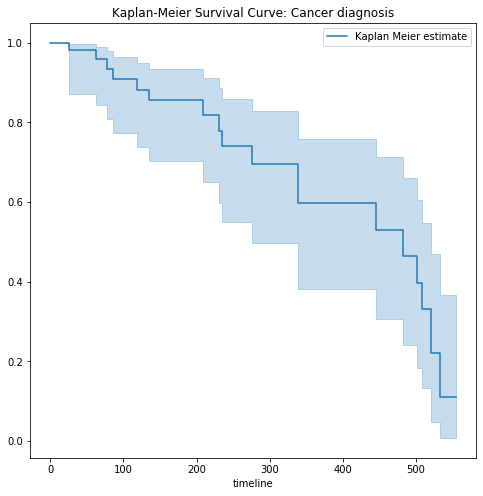

In [7]:
#Plotting the result
fig, ax = subplots(figsize=(8,8))
km_cancer.plot(title='Kaplan-Meier Survival Curve: Cancer diagnosis', label='Kaplan Meier estimate', ax=ax)